## Calculation of the two-dimensional diffraction fingerprint

Author: _Angelo Ziletti (ziletti@fhi-berlin.mpg.de, angelo.ziletti@gmail.com)_

The code below allows to calculate the two-dimensional diffraction fingerprint, introduced in Ref. [1].

Let us first load the necessary packages.

In [4]:
from ase.spacegroup import crystal
from ase.io import write
from ai4materials.descriptors.diffraction2d import Diffraction2D
from ai4materials.utils.utils_config import set_configs
from ai4materials.utils.utils_crystals import create_supercell
import numpy as np
from PIL import Image

# setup configs
configs = set_configs(main_folder='./desc_2d_diff_ai4materials')

We then create a face-centered-cubic crystal structure, using the ASE package, and then create a supercell with 256 atoms.

In [8]:
# create the fcc aluminium structure
fcc_al = crystal('Al', [(0, 0, 0)], spacegroup=225, cellpar=[4.05, 4.05, 4.05, 90, 90, 90])
structure = create_supercell(fcc_al, target_nb_atoms=256)

In [14]:
from ase.visualize import view
view(structure, viewer='x3d')

We can now calculate the two-dimensional diffraction fingerprint with *ai4materials*. The result is store in the intensity_rgb numpy array.

In [16]:
# calculate the two-dimensional diffraction fingerprint
descriptor = Diffraction2D(configs=configs)
structure_result = descriptor.calculate(structure)
intensity_rgb = structure_result.info['descriptor']['diffraction_2d_intensity']
intensity_rgb.shape

(64, 64, 3)

Since the two-dimensional diffraction fingerprint is an RGB image, let us visualize it.

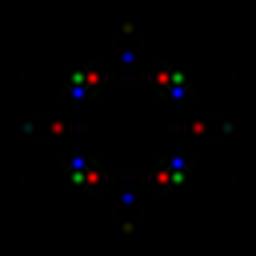

In [17]:
# write the diffraction fingerprint as png image
rgb_array = np.zeros((intensity_rgb.shape[0], intensity_rgb.shape[1], intensity_rgb.shape[2]), 'uint8')
current_img = list(intensity_rgb.reshape(-1, intensity_rgb.shape[0], intensity_rgb.shape[1]))
for ix_ch in range(len(current_img)):
    rgb_array[..., ix_ch] = current_img[ix_ch] * 255
img = Image.fromarray(rgb_array)
img = img.resize([256, 256], Image.ANTIALIAS)
img

## Reference:
A. Ziletti, D. Kumar, M. Scheffler, and L. M. Ghiringhelli, “[Insightful classification of crystal structures using deep learning](https://www.nature.com/articles/s41467-018-05169-6),” Nature Communications, vol. 9, pp. 2775, 2018.
